In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

# to make plot displayed in notebook
%matplotlib inline

In [25]:
df = pd.read_csv("./salary_data.csv")

In [26]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_provided  742 non

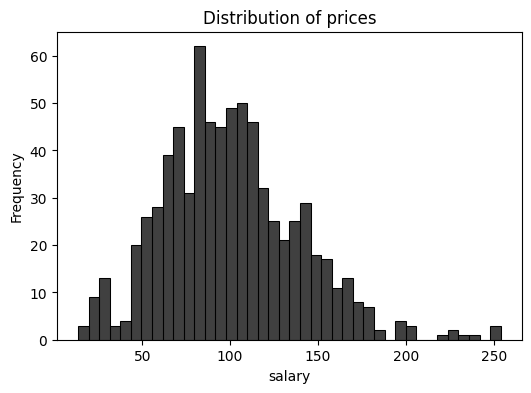

In [28]:
plt.figure(figsize=(6, 4))

sns.histplot(df.avg_salary, bins=40, color='black')
plt.ylabel('Frequency')
plt.xlabel('salary')
plt.title('Distribution of prices')

plt.show()

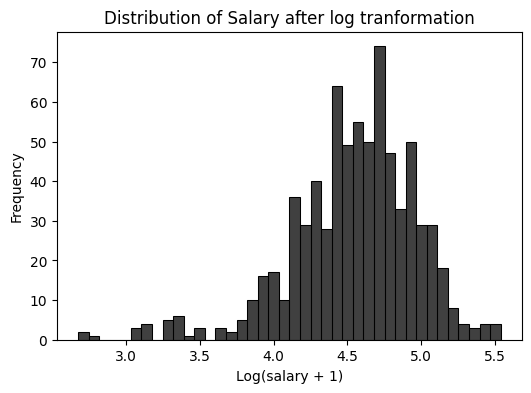

In [29]:
log_price = np.log1p(df.avg_salary)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black')
plt.ylabel('Frequency')
plt.xlabel('Log(salary + 1)')
plt.title('Distribution of Salary after log tranformation')

plt.show()

## Exploratory data analysis

* Check missing values
* Look at the target variable
* Look at numerical and categorical variables


Missing Values:
 Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
job_simp             0
seniority            0
desc_len             0
num_comp             0
dtype: int64


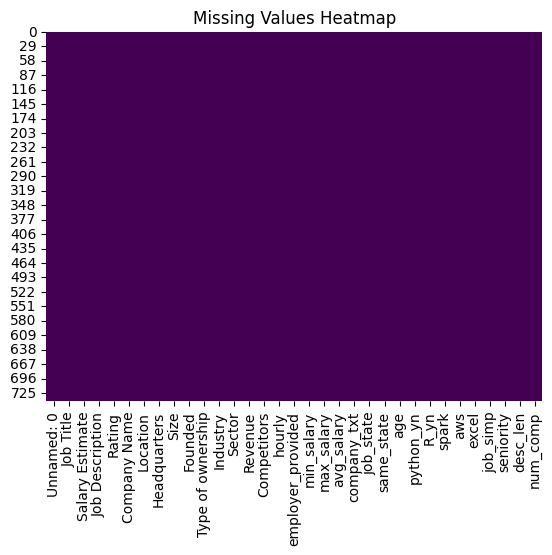

In [30]:
print("\nMissing Values:\n", df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [31]:
df = df.reset_index(drop=True)

In [32]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_features = list(df.dtypes[df.dtypes == 'object'].index)
print(categorical_features, len(categorical_features))
for c in categorical_features:
    df[c] = df[c].str.lower().str.replace(' ', '_')

['job_title', 'salary_estimate', 'job_description', 'company_name', 'location', 'headquarters', 'size', 'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors', 'company_txt', 'job_state', 'job_simp', 'seniority'] 16


In [33]:
len(df[categorical_features].columns)

16

In [34]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
features_to_remove = ['min_salary', 'max_salary', "unnamed:_0", "avg_salary"] #since they influence the Y value directly
numerical_features = [x for x in numerical_features if x not in features_to_remove]
numerical_features

['rating',
 'founded',
 'hourly',
 'employer_provided',
 'same_state',
 'age',
 'python_yn',
 'r_yn',
 'spark',
 'aws',
 'excel',
 'desc_len',
 'num_comp']

NUMERICAL FEATURES SHORTLISTING & CORRELATION ANALYSIS

WHY FILTER NUMERICAL FEATURES?

1. Remove features with low correlation to target (salary)
   • Weak predictive power → noise in model
   • Reduces overfitting

2. Reduce dimensionality
   • Simpler model, faster training
   • Better generalization

3. Improve model interpretability
   • Focus on most important features
   • Easier to explain to stakeholders

STRATEGY:
   • Calculate correlation of each numerical feature with salary
   • Keep only features with |correlation| > threshold
   • Default threshold: 0.05-0.10 (moderate correlation)


STEP 1: CALCULATE CORRELATIONS

Numerical Features: ['rating', 'founded', 'hourly', 'employer_provided', 'same_state', 'age', 'python_yn', 'r_yn', 'spark', 'aws', 'excel', 'desc_len', 'num_comp']
Total: 13

Feature Correlations with Salary (sorted by strength):

  python_yn           : +0.3278  (+ Strong)
  spark               : +0.1766  (+ Strong)
  aws                 : +0.1714  (+ Strong

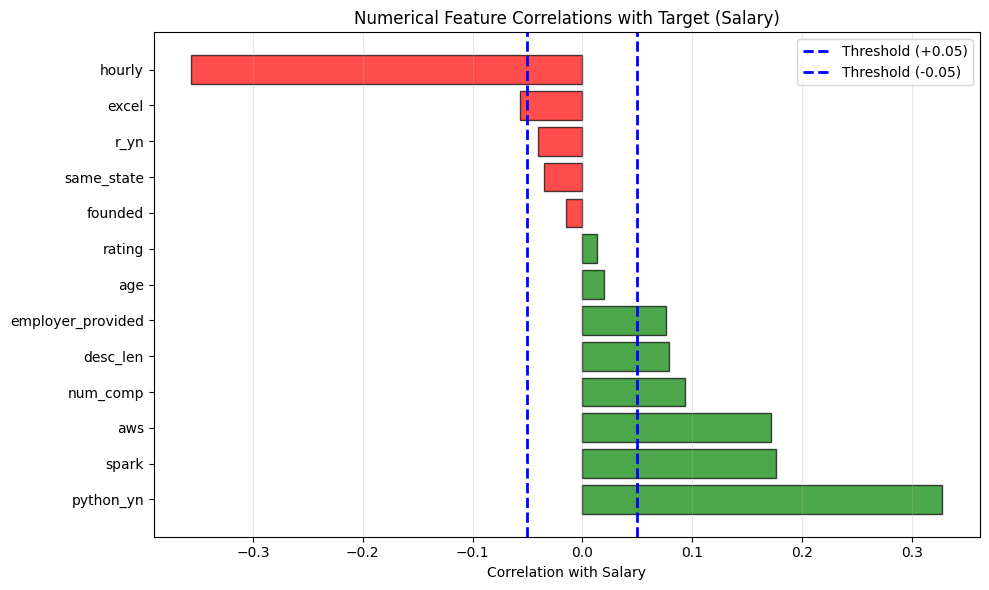

✓ Correlation visualization complete!

SUMMARY: NUMERICAL FEATURES SHORTLISTING


✓ SELECTED FEATURES FOR TRAINING:
  ['python_yn', 'spark', 'aws', 'num_comp', 'desc_len', 'employer_provided', 'excel', 'hourly']

✓ STATISTICS:
  • Correlation threshold: 0.05
  • Features kept: 8/13
  • Features removed: 5/13
  • Correlation range: -0.3561 to 0.3278

✓ KEY INSIGHTS:
  • Strongest feature: python_yn (+0.3278)
  • Weakest kept feature: hourly (-0.3561)

✓ NEXT STEPS:
  1. Combine numerical features with categorical features
  2. Create train/test split
  3. Train models using selected features
  4. Evaluate model performance

✓ VARIABLE AVAILABLE FOR NEXT STEPS:
  • strong_features: List of selected numerical features
  • X_numerical: DataFrame with selected numerical features
  • y: Target variable (salary)


✓ Numerical features shortlisting complete!


In [ ]:
# Numerical Features Analysis & Correlation-Based Filtering
y = df['avg_salary'].copy()

# Calculate correlation with target
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
features_to_remove = ['min_salary', 'max_salary', "unnamed:_0", "avg_salary"]
numerical_features = [x for x in numerical_features if x not in features_to_remove]

correlation_with_target = df[numerical_features].corrwith(y)
correlation_sorted = correlation_with_target.sort_values(ascending=False)

# Filter features based on correlation threshold
correlation_threshold = 0.05
strong_features = correlation_sorted[abs(correlation_sorted) > correlation_threshold].index.tolist()
weak_features = correlation_sorted[abs(correlation_sorted) <= correlation_threshold].index.tolist()

print(f"Strong features kept: {len(strong_features)}/{len(numerical_features)}")
print(f"Features: {strong_features}")

# Create X with only strong features
X_numerical = df[strong_features].copy()

# Visualization
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in correlation_sorted.values]
bars = ax.barh(range(len(correlation_sorted)), correlation_sorted.values, color=colors, alpha=0.7, edgecolor='black')

ax.axvline(x=correlation_threshold, color='blue', linestyle='--', linewidth=2, label=f'Threshold (+{correlation_threshold})')
ax.axvline(x=-correlation_threshold, color='blue', linestyle='--', linewidth=2, label=f'Threshold (-{correlation_threshold})')

ax.set_yticks(range(len(correlation_sorted)))
ax.set_yticklabels(correlation_sorted.index)
ax.set_xlabel('Correlation with Salary')
ax.set_title('Numerical Feature Correlations with Target (Salary)')
ax.legend()
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

In [ ]:
# Categorical Features Analysis & Selection
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer

categorical_analysis = []

for cat_feat in categorical_features:
    unique_count = df[cat_feat].nunique()
    missing_count = df[cat_feat].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    
    le = LabelEncoder()
    encoded = le.fit_transform(df[cat_feat].astype(str))
    y = df.avg_salary
    cat_correlation = pd.Series(encoded).corr(y)
    
    categorical_analysis.append({
        'feature': cat_feat,
        'unique_values': unique_count,
        'missing_count': missing_count,
        'missing_pct': missing_pct,
        'correlation': cat_correlation,
        'abs_correlation': abs(cat_correlation)
    })

cat_analysis_df = pd.DataFrame(categorical_analysis).sort_values('abs_correlation', ascending=False)

# Automatic feature selection
unique_threshold = 50
missing_threshold = 30
correlation_threshold_cat = 0.02

selected_cat_features = []
rejected_cat_features = []

for _, row in cat_analysis_df.iterrows():
    feat = row['feature']
    
    if (row['unique_values'] <= unique_threshold and 
        row['missing_pct'] <= missing_threshold and 
        row['abs_correlation'] > correlation_threshold_cat):
        selected_cat_features.append(feat)
    else:
        rejected_cat_features.append(feat)

print(f"Selected categorical features: {len(selected_cat_features)}")
print(f"Rejected categorical features: {len(rejected_cat_features)}")

# Prepare features for training
X_categorical = df[selected_cat_features].copy()

# Handle missing values
for col in X_categorical.columns:
    if X_categorical[col].isnull().sum() > 0:
        X_categorical[col] = X_categorical[col].fillna('missing')

# Combine numerical and categorical features
X_combined_dict = pd.concat([df[strong_features], X_categorical], axis=1)

# Convert to dictionary format for DictVectorizer
categorical_dicts = X_combined_dict.to_dict('records')

# Apply DictVectorizer
vectorizer = DictVectorizer(sparse=False, dtype=int)
X_combined = vectorizer.fit_transform(categorical_dicts)
feature_names = vectorizer.get_feature_names_out()

y_combined = y.copy()

print(f"Total features: {X_combined.shape[1]}")
print(f"Total samples: {X_combined.shape[0]}")

STEP 1: ANALYZE CATEGORICAL FEATURES

Categorical Features Found: ['job_title', 'salary_estimate', 'job_description', 'company_name', 'location', 'headquarters', 'size', 'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors', 'company_txt', 'job_state', 'job_simp', 'seniority']
Total: 16

📋 CATEGORICAL FEATURE ANALYSIS:
--------------------------------------------------------------------------------

job_title:
  Unique values: 264
  Missing: 0 (0.00%)
  Correlation with salary: +0.2146
  Top categories: {'data_scientist': 131, 'data_engineer': 53, 'senior_data_scientist': 34}

salary_estimate:
  Unique values: 416
  Missing: 0 (0.00%)
  Correlation with salary: -0.0183
  Top categories: {'$54k-$115k_(glassdoor_est.)': 6, '$21-$34_per_hour(glassdoor_est.)': 6, '$49k-$113k_(glassdoor_est.)': 6}

job_description:
  Unique values: 463
  Missing: 0 (0.00%)
  Correlation with salary: -0.0117
  Top categories: {'description\nmedical_laboratory_scientist_-_texas_health_huguley-_o

In [70]:
X_combined_dict

,python_yn,spark,aws,num_comp,desc_len,employer_provided,excel,hourly,seniority,job_state,type_of_ownership,sector,job_simp,revenue,size
0,1,0,0,0,2536,0,1,0,na,nm,company_-_private,aerospace_&_defense,data_scientist,$50_to_$100_million_(usd),501_to_1000_employees
1,1,0,0,0,4783,0,0,0,na,md,other_organization,health_care,data_scientist,$2_to_$5_billion_(usd),10000+_employees
2,1,1,0,0,3461,0,1,0,na,fl,company_-_private,business_services,data_scientist,$100_to_$500_million_(usd),501_to_1000_employees
3,1,0,0,3,3883,0,0,0,na,wa,government,"oil,_gas,_energy_&_utilities",data_scientist,$500_million_to_$1_billion_(usd),1001_to_5000_employees
4,1,0,0,3,2728,0,1,0,na,ny,company_-_private,business_services,data_scientist,unknown_/_non-applicable,51_to_200_employees
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,0,0,1,3,6162,0,0,0,senior,ma,company_-_public,biotech_&_pharmaceuticals,na,$10+_billion_(usd),10000+_employees
738,1,1,1,3,6130,0,0,0,senior,tn,company_-_public,information_technology,data_engineer,$100_to_$500_million_(usd),1001_to_5000_employees
739,0,0,0,0,3078,0,1,0,na,pa,college_/_university,education,na,unknown_/_non-applicable,501_to_1000_employees
740,0,0,0,0,1642,0,1,0,na,pa,company_-_private,business_services,manager,$5_to_$10_million_(usd),1_to_50_employees


In [ ]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, 
    y_combined, 
    test_size=0.2, 
    random_state=42
)

print(f"Train samples: {len(X_train_combined)} (80%)")
print(f"Test samples: {len(X_test_combined)} (20%)")
print(f"Features: {X_train_combined.shape[1]}")

STEP 7: CREATE TRAIN/TEST SPLIT FOR COMBINED DATASET

✓ Train/Test Split Complete:

  Total samples: 742
  Train samples: 593 (80%)
  Test samples: 149 (20%)

✓ Feature Dimensions:
  X_train_combined shape: (593, 114)
  X_test_combined shape: (149, 114)
  y_train_combined shape: (593,)
  y_test_combined shape: (149,)

SUMMARY: DATA READY FOR MODEL TRAINING

✓ USE THESE FOR MODEL TRAINING:
  • X_train_combined → Training features (numerical + categorical)
  • y_train_combined → Training target
  • X_test_combined  → Test features (numerical + categorical)
  • y_test_combined  → Test target

✓ DATASET INFO:
  • Total features: 114
  • Numerical: 8
  • Categorical (encoded): 106
  • Training samples: 593
  • Test samples: 149



In [ ]:
# Train & Compare Multiple ML Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'RandomForest': RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVR': SVR(kernel='rbf', C=100),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

# Train and evaluate models
results_comparison = {}

print("Training models...")
for model_name, model in models.items():
    print(f"  {model_name}...", end=" ")
    
    try:
        model.fit(X_train_combined, y_train_combined)
        
        cv_scores = cross_val_score(model, X_train_combined, y_train_combined, cv=5, scoring='r2')
        
        y_pred_train = model.predict(X_train_combined)
        y_pred_test = model.predict(X_test_combined)
        
        train_rmse = np.sqrt(mean_squared_error(y_train_combined, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test_combined, y_pred_test))
        train_r2 = r2_score(y_train_combined, y_pred_train)
        test_r2 = r2_score(y_test_combined, y_pred_test)
        
        results_comparison[model_name] = {
            'model': model,
            'cv_r2_mean': cv_scores.mean(),
            'cv_r2_std': cv_scores.std(),
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'overfitting_gap': train_r2 - test_r2
        }
        
        print("✓")
    except Exception as e:
        print(f"✗")

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results_comparison.keys()),
    'CV R² (mean)': [results_comparison[m]['cv_r2_mean'] for m in results_comparison.keys()],
    'CV R² (std)': [results_comparison[m]['cv_r2_std'] for m in results_comparison.keys()],
    'Train RMSE': [results_comparison[m]['train_rmse'] for m in results_comparison.keys()],
    'Test RMSE': [results_comparison[m]['test_rmse'] for m in results_comparison.keys()],
    'Test R²': [results_comparison[m]['test_r2'] for m in results_comparison.keys()],
    'Overfitting': [results_comparison[m]['overfitting_gap'] for m in results_comparison.keys()],
})

comparison_df = comparison_df.sort_values('Test R²', ascending=False).reset_index(drop=True)

print("\nModel Comparison Results:")
print(comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_model_obj = results_comparison[best_model_name]['model']
best_test_r2 = comparison_df.iloc[0]['Test R²']
best_test_rmse = comparison_df.iloc[0]['Test RMSE']

print(f"\nBest Model: {best_model_name}")
print(f"  Test R²: {best_test_r2:.4f}")
print(f"  Test RMSE: ${best_test_rmse:.2f}k")

best_model_final = best_model_obj

STEP 8: TRAIN & COMPARE MULTIPLE ML MODELS FOR SALARY PREDICTION

WHY DIFFERENT MODELS FOR SALARY PREDICTION?

1. LINEAR MODELS (Linear, Ridge, Lasso, ElasticNet):
   ✓ Fast, interpretable, work well with small datasets
   ✗ May underfit if relationship is non-linear
   Best for: Understanding feature importance

2. TREE-BASED MODELS (RandomForest, GradientBoosting, AdaBoost):
   ✓ Handle non-linear relationships, capture feature interactions
   ✓ Robust to outliers, work well with mixed data types
   ✗ Can overfit on small datasets
   Best for: Complex patterns, feature interactions

3. SUPPORT VECTOR MACHINES (SVR):
   ✓ Good for high-dimensional data, regularization built-in
   ✗ Slower to train, less interpretable
   Best for: Small to medium datasets with noise

4. K-NEAREST NEIGHBORS (KNN):
   ✓ Simple, captures local patterns
   ✗ Slow prediction, memory-intensive
   Best for: Sanity check, local patterns



TRAINING MODELS...

Training Linear Regression... ✓
Training Ridge... ✓

In [75]:
best_model_obj

,n_estimators,200
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Test single sample prediction
sample_index = 158

X_single = X_train_combined[sample_index:sample_index+1]
y_actual = y_train_combined.iloc[sample_index]

y_prediction = best_model_obj.predict(X_single)[0]

error_dollars = y_actual - y_prediction
error_percent = (error_dollars / y_actual) * 100

print(f"Sample #{sample_index}:")
print(f"  Actual:    ${y_actual:.2f}k")
print(f"  Predicted: ${y_prediction:.2f}k")
print(f"  Error:     ${error_dollars:.2f}k ({error_percent:+.2f}%)")

if abs(error_percent) < 10:
    quality = "EXCELLENT"
elif abs(error_percent) < 20:
    quality = "GOOD"
elif abs(error_percent) < 30:
    quality = "ACCEPTABLE"
else:
    quality = "POOR"

print(f"  Quality:   {quality}")

Selecting sample #158 from test set...

✓ Single Sample Selected:
  Sample shape: (1, 114)
  Actual Salary: $134.50k

✓ Prediction Made:
  Predicted Salary: $131.78k

✓ Comparison:
  Actual:    $134.50k
  Predicted: $131.78k
  Error:     $2.72k (+2.03%)
  Quality:   ✓ EXCELLENT


In [80]:
X_single

array([[   0, 4438,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    1,    0,    0,    0,    0,    1,    0,
           0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,
           0,    0,    0,    0]])

In [81]:
import pickle
#saving the model to local folder

model_package = {
    'model': best_model_final,
    'dict_vectorizer': vectorizer,
}

with open('salary_model.pkl', 'wb') as file:
    pickle.dump(model_package, file)

Get individual person job profile here

In [104]:
custmer_no = 98
X_combined_dict.iloc[custmer_no].to_dict()

{'python_yn': 0,
 'spark': 0,
 'aws': 0,
 'num_comp': 3,
 'desc_len': 4203,
 'employer_provided': 0,
 'excel': 1,
 'hourly': 0,
 'seniority': 'na',
 'job_state': 'wi',
 'type_of_ownership': 'company_-_private',
 'sector': 'insurance',
 'job_simp': 'analyst',
 'revenue': '$2_to_$5_billion_(usd)',
 'size': '1001_to_5000_employees'}

In [105]:
y_combined.iloc[custmer_no]

np.float64(56.5)